In [0]:
# Load libraries

import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import precision_recall_fscore_support
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import label_binarize,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (roc_curve,
                             auc,
                             confusion_matrix,
                             recall_score,
                             roc_auc_score,
                             accuracy_score,
                             balanced_accuracy_score,
                             classification_report,
                             f1_score,
                             precision_recall_fscore_support)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc, plot_roc_curve
import scikitplot as skplt

In [0]:
#!pip install scikit-plot

In [0]:
def results_report(model,x_te,y_te):
    metrics={}
    y_pred = model.predict(x_te)
    metrics['acc']=accuracy_score(y_te,y_pred)
    metrics['recall']=recall_score(y_te,y_pred,average='macro')
    metrics['f_1_score']=f1_score(y_te,y_pred,average='macro')
    classes = list(set(y_te).union(set(y_pred)))
    metrics['roc_auc_score']=roc_auc_score(label_binarize(y_te,classes),label_binarize(y_pred,classes))
    
    #plt.bar(metrics.keys(),metrics.values())
    #plt.show()
    return metrics

In [0]:
resultats={}

In [8]:
#liste des fichiers
os.listdir()

['.config', 'Aggregation.txt', 'flame.txt', 'spiral.txt', 'sample_data']

EXPLORATION DES DONNEES

In [0]:
#lecture du fichier
data=pd.read_csv('Aggregation.txt', sep='\t', header=None)

In [131]:
data.head()

,0,1,2
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd315e58128>,
      dtype=object)

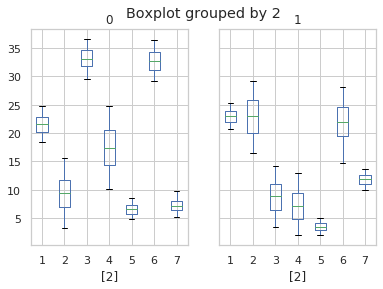

In [132]:
data.boxplot( by=2)

[Text(0.5, 0, 'classe')]

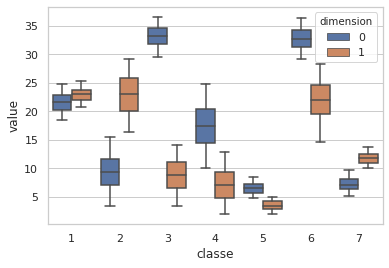

In [133]:
dd=pd.melt(data,id_vars=[2],value_vars=[0,1],var_name='dimension')
ax=sns.boxplot(x=2,y='value',data=dd,hue='dimension')
ax.set(xlabel='classe')

In [134]:
print("nombre de classe %s" % len(set(data[2])))

nombre de classe 7


No handles with labels found to put in legend.


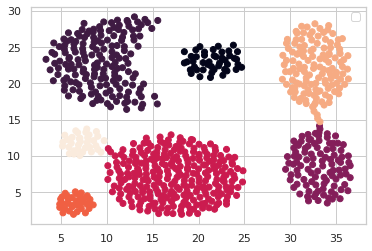

In [135]:
fig, ax = plt.subplots()
plt.scatter(data[0], data[1], c=data[2])
ax.legend()
plt.show()

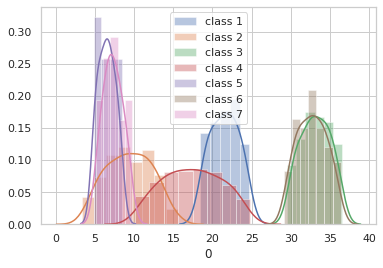

In [136]:
#graph de la premiere dimension en fonction de chaque classe
[sns.distplot(data[0][data[2]==label], label="class {}".format(label)) for label in np.unique(data[2])]
plt.legend();

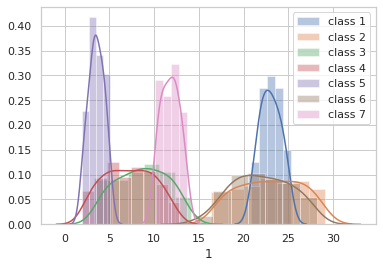

In [137]:
#graphe de la deuxieme dimension en fonction de chaque classe
[sns.distplot(data[1][data[2]==label], label="class {}".format(label)) for label in np.unique(data[2])]
plt.legend();

In [138]:
# Summarize Data

# Load dataset
dataset = data
# Descriptive statistics
# shape
print(dataset.shape)
# types
set_option('display.max_rows', 500)
print("types de chaque variable : \n%s\n" % dataset.dtypes)
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())
# class distribution
print("répartition des effectifs dans chaque classe :\n %s\n" % dataset.groupby(2).size())
# head
set_option('display.width', 100)
print("5 premier éléments")
print(dataset.head())



(788, 3)
types de chaque variable : 
0    float64
1    float64
2      int64
dtype: object

             0        1        2
count  788.000  788.000  788.000
mean    19.567   14.172    3.770
std      9.922    8.090    1.596
min      3.350    1.950    1.000
25%     11.150    7.037    2.000
50%     18.225   11.725    4.000
75%     30.700   21.962    5.000
max     36.550   29.150    7.000
répartition des effectifs dans chaque classe :
 2
1     45
2    170
3    102
4    273
5     34
6    130
7     34
dtype: int64

5 premier éléments
       0      1  2
0  15.55  28.65  2
1  14.90  27.55  2
2  14.45  28.35  2
3  14.15  28.80  2
4  13.75  28.05  2


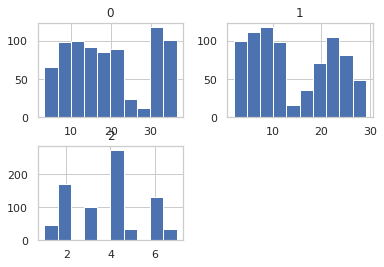

In [139]:
# Data visualizations
# histograms
dataset.hist()
pyplot.show()

In [0]:
## density
#dataset.plot(kind='density', subplots=True, sharex=False, legend=False)
#pyplot.show()
## box and whisker plots
##dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False)
##pyplot.show()


In [0]:
# scatter plot matrix
#scatter_matrix(dataset)
#pyplot.show()

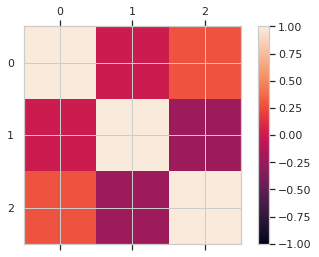

In [141]:

# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset[0:-2].corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

PREPARATION DES DONNEES

In [142]:

# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,0:2].astype(float)
Y = array[:,2]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, stratify=Y)
#
sm = SMOTE(random_state = 2) 
X_train, Y_train = sm.fit_sample(X_train, Y_train.ravel()) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [143]:
np.bincount(Y_train.astype(int))

array([  0, 218, 218, 218, 218, 218, 218, 218])

ESTIMATION DES MEILLEURS PARAMETRES POUR CHAUQUE ALGORITHME

In [144]:
# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'roc_auc_ovr'

# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(probability=True)))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('SVM_Linear', LinearSVC( )))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=num_folds)#, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.999708 (0.000481)
LDA: 0.999954 (0.000092)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


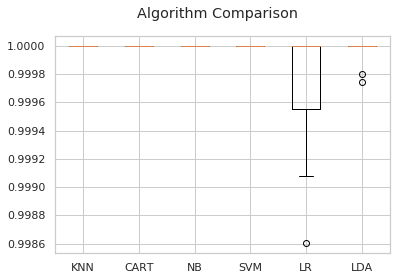

In [145]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



******  RESULTAT POUR KNN ******

accuracy score : 1.0 

Matrice de confusion : 
[[ 9  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 55  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  7]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        34
         3.0       1.00      1.00      1.00        20
         4.0       1.00      1.00      1.00        55
         5.0       1.00      1.00      1.00         7
         6.0       1.00      1.00      1.00        26
         7.0       1.00      1.00      1.00         7

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158

KNN

******  RESULTAT POUR CART ******

accuracy score : 1.0 

Matrice de confusion : 
[[ 9  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0]
 [ 0  0 20  0  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)



******  RESULTAT POUR NB ******

accuracy score : 1.0 

Matrice de confusion : 
[[ 9  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 55  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  7]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        34
         3.0       1.00      1.00      1.00        20
         4.0       1.00      1.00      1.00        55
         5.0       1.00      1.00      1.00         7
         6.0       1.00      1.00      1.00        26
         7.0       1.00      1.00      1.00         7

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158

NB

******  RESULTAT POUR SVM ******

accuracy score : 1.0 

Matrice de confusion : 
[[ 9  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0]
 [ 0  0 20  0  0  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



******  RESULTAT POUR LR ******

accuracy score : 0.9746835443037974 

Matrice de confusion : 
[[ 8  1  0  0  0  0  0]
 [ 3 31  0  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 55  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  7]] 

              precision    recall  f1-score   support

         1.0       0.73      0.89      0.80         9
         2.0       0.97      0.91      0.94        34
         3.0       1.00      1.00      1.00        20
         4.0       1.00      1.00      1.00        55
         5.0       1.00      1.00      1.00         7
         6.0       1.00      1.00      1.00        26
         7.0       1.00      1.00      1.00         7

    accuracy                           0.97       158
   macro avg       0.96      0.97      0.96       158
weighted avg       0.98      0.97      0.98       158

LR


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)



******  RESULTAT POUR LDA ******

accuracy score : 0.9746835443037974 

Matrice de confusion : 
[[ 9  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  1]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 52  2  0  1]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  7]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         9
         2.0       1.00      0.97      0.99        34
         3.0       1.00      1.00      1.00        20
         4.0       1.00      0.95      0.97        55
         5.0       0.78      1.00      0.88         7
         6.0       1.00      1.00      1.00        26
         7.0       0.78      1.00      0.88         7

    accuracy                           0.97       158
   macro avg       0.94      0.99      0.96       158
weighted avg       0.98      0.97      0.98       158

LDA


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


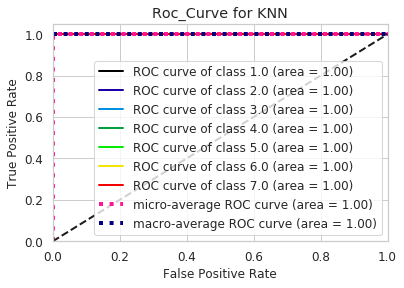

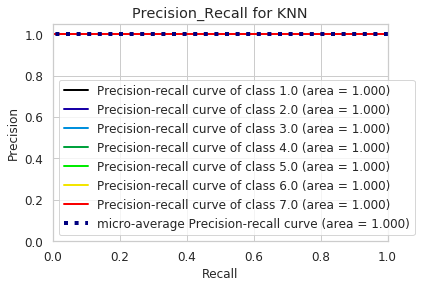

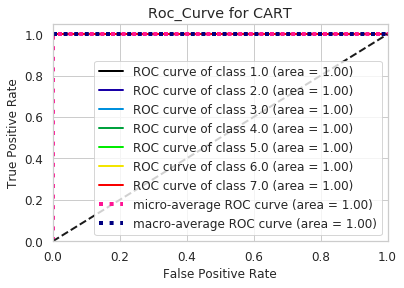

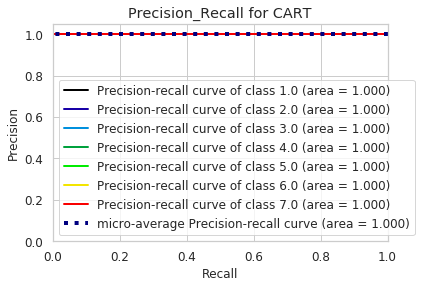

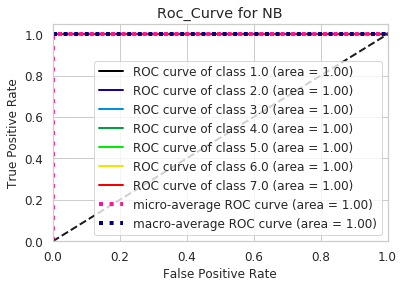

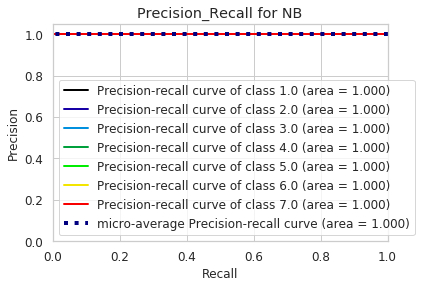

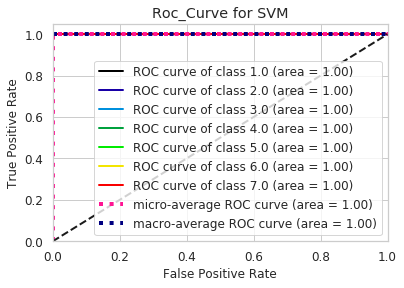

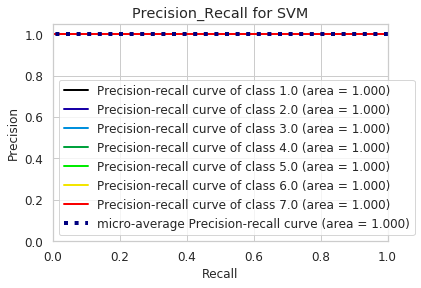

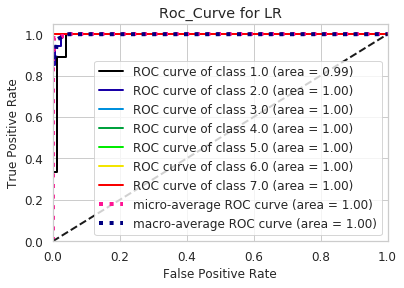

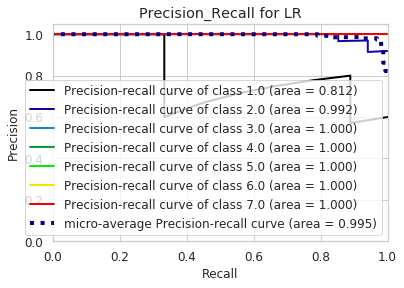

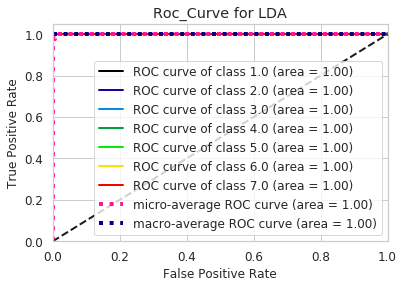

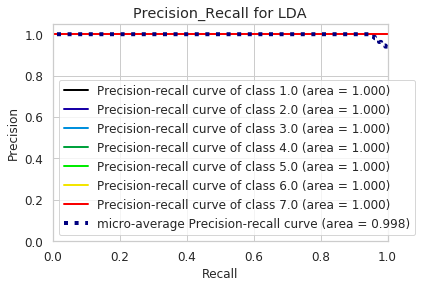

In [146]:
for name, model in models:
  print("\n******  RESULTAT POUR {} ******\n".format(name))
  model.fit(X_train, Y_train)
	#scales_models.append(model)
	#names.append(name)
	#msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  # estimate accuracy on validation dataset
	#print(msg)

  #rescaledValidationX = scaler.transform(X_validation)
  predictions = model.predict(X_validation)#rescaledValidationX)
  print("accuracy score : {} \n".format(accuracy_score(Y_validation, predictions)))
  print("Matrice de confusion : \n{} \n".format(confusion_matrix(Y_validation, predictions)))
  print(classification_report(Y_validation, predictions))
  predict_proba = getattr(model, "predict_proba", None)
  resultats[name]=results_report(model, X_validation, Y_validation)
  if callable(predict_proba):
    print(name)
    y_probas = model.predict_proba(X_validation)
    skplt.metrics.plot_roc(Y_validation, y_probas, title="Roc_Curve for {}".format(name))
    skplt.metrics.plot_precision_recall_curve(Y_validation,y_probas, title="Precision_Recall for {}".format(name))

In [147]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(probability=True))])))
results = []
names = []
for name, model in pipelines:
	kfold = StratifiedKFold(n_splits=num_folds)#, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 1.000000 (0.000000)
ScaledLDA: 0.999954 (0.000092)
ScaledKNN: 1.000000 (0.000000)
ScaledCART: 1.000000 (0.000000)
ScaledNB: 1.000000 (0.000000)
ScaledSVM: 1.000000 (0.000000)


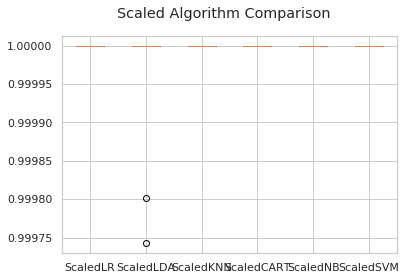

In [148]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



******  RESULTAT POUR ScaledLR ******

accuracy score : 1.0 

Matrice de connfusion : 
[[ 9  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 55  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  7]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        34
         3.0       1.00      1.00      1.00        20
         4.0       1.00      1.00      1.00        55
         5.0       1.00      1.00      1.00         7
         6.0       1.00      1.00      1.00        26
         7.0       1.00      1.00      1.00         7

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158

ScaledLR

******  RESULTAT POUR ScaledLDA ******

accuracy score : 0.9746835443037974 

Matrice de connfusion : 
[[ 9  0  0  0  0  0  0]
 [ 0 33

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)



******  RESULTAT POUR ScaledKNN ******

accuracy score : 1.0 

Matrice de connfusion : 
[[ 9  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 55  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  7]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        34
         3.0       1.00      1.00      1.00        20
         4.0       1.00      1.00      1.00        55
         5.0       1.00      1.00      1.00         7
         6.0       1.00      1.00      1.00        26
         7.0       1.00      1.00      1.00         7

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158

ScaledKNN

******  RESULTAT POUR ScaledCART ******

accuracy score : 1.0 

Matrice de connfusion : 
[[ 9  0  0  0  0  0  0]
 [ 0 34  0  0  0  0

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)



******  RESULTAT POUR ScaledNB ******

accuracy score : 1.0 

Matrice de connfusion : 
[[ 9  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 55  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  7]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        34
         3.0       1.00      1.00      1.00        20
         4.0       1.00      1.00      1.00        55
         5.0       1.00      1.00      1.00         7
         6.0       1.00      1.00      1.00        26
         7.0       1.00      1.00      1.00         7

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158

ScaledNB

******  RESULTAT POUR ScaledSVM ******

accuracy score : 1.0 

Matrice de connfusion : 
[[ 9  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


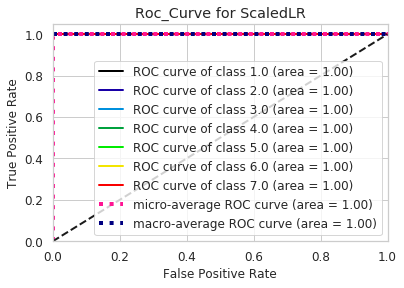

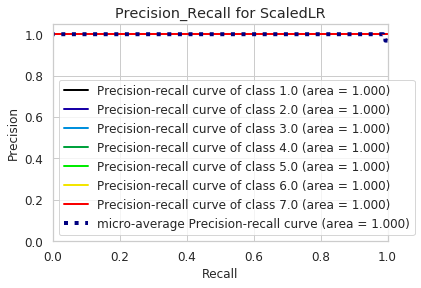

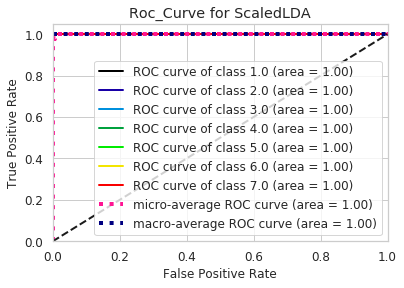

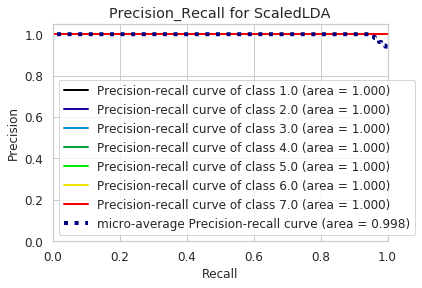

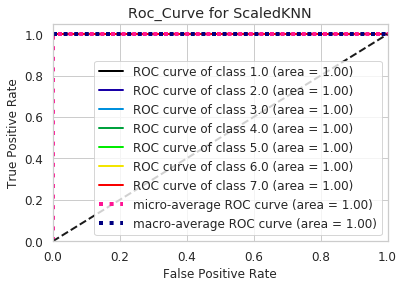

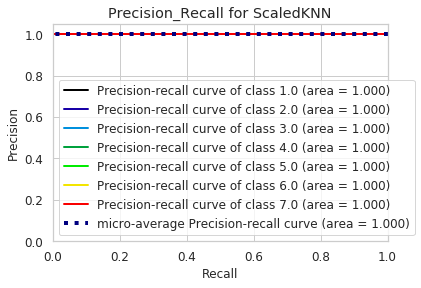

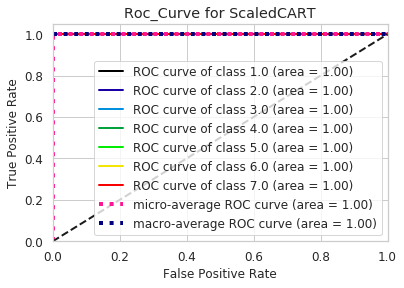

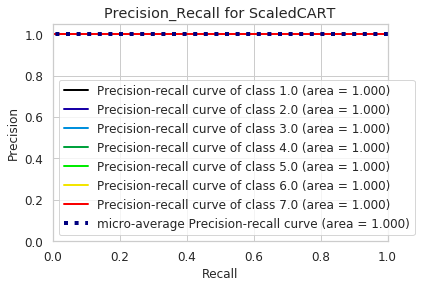

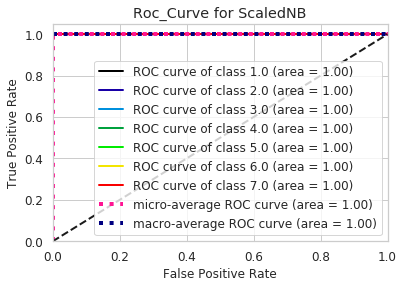

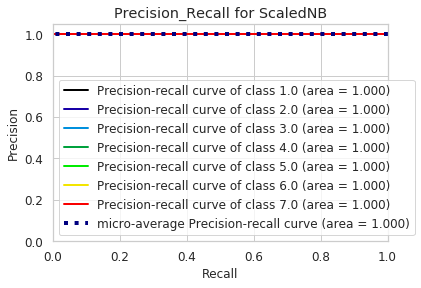

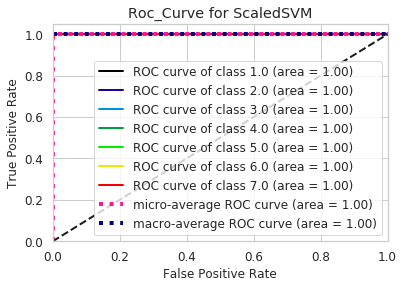

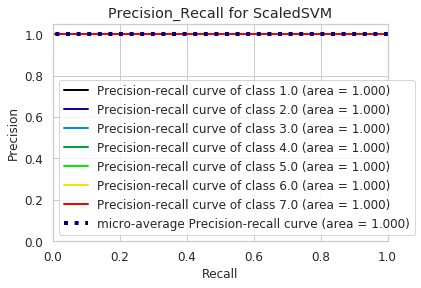

In [149]:
#scales_models=[]
for name, model in pipelines:
  print("\n******  RESULTAT POUR {} ******\n".format(name))
  model.fit(X_train, Y_train)
	#scales_models.append(model)
	#names.append(name)
	#msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  # estimate accuracy on validation dataset
	#print(msg)

  #rescaledValidationX = scaler.transform(X_validation)
  predictions = model.predict(X_validation)#rescaledValidationX)
  print("accuracy score : {} \n".format(accuracy_score(Y_validation, predictions)))
  print("Matrice de connfusion : \n{} \n".format(confusion_matrix(Y_validation, predictions)))
  print(classification_report(Y_validation, predictions))
  predict_proba = getattr(model, "predict_proba", None) 
  resultats[name]=results_report(model, X_validation, Y_validation)
  if callable(predict_proba):
    print(name)
    y_probas = model.predict_proba(X_validation)
    skplt.metrics.plot_roc(Y_validation, y_probas, title="Roc_Curve for {}".format(name))
    skplt.metrics.plot_precision_recall_curve(Y_validation,y_probas, title="Precision_Recall for {}".format(name))

In [150]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 1.000000 using {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 3}
1.000000 (0.000000) with: {'n_neighbors': 5}
1.000000 (0.000000) with: {'n_neighbors': 7}
1.000000 (0.000000) with: {'n_neighbors': 9}
1.000000 (0.000000) with: {'n_neighbors': 11}
1.000000 (0.000000) with: {'n_neighbors': 13}
1.000000 (0.000000) with: {'n_neighbors': 15}
1.000000 (0.000000) with: {'n_neighbors': 17}
1.000000 (0.000000) with: {'n_neighbors': 19}
1.000000 (0.000000) with: {'n_neighbors': 21}


In [151]:
# Finalize Model

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = grid_result.best_estimator_.predict(rescaledValidationX)
print("Best KNN using %s\n" % (grid_result.best_params_))
print("accuracy score : {} \n".format(accuracy_score(Y_validation, predictions)))
print("Matrice de confusion : \n{} \n".format(confusion_matrix(Y_validation, predictions)))
print(classification_report(Y_validation, predictions))

Best KNN using {'n_neighbors': 1}

accuracy score : 1.0 

Matrice de confusion : 
[[ 9  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 55  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  7]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        34
         3.0       1.00      1.00      1.00        20
         4.0       1.00      1.00      1.00        55
         5.0       1.00      1.00      1.00         7
         6.0       1.00      1.00      1.00        26
         7.0       1.00      1.00      1.00         7

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [152]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(probability=True)
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 1.000000 using {'C': 0.1, 'kernel': 'linear'}
1.000000 (0.000000) with: {'C': 0.1, 'kernel': 'linear'}
0.999980 (0.000040) with: {'C': 0.1, 'kernel': 'poly'}
1.000000 (0.000000) with: {'C': 0.1, 'kernel': 'rbf'}
0.995064 (0.002298) with: {'C': 0.1, 'kernel': 'sigmoid'}
1.000000 (0.000000) with: {'C': 0.3, 'kernel': 'linear'}
0.999975 (0.000051) with: {'C': 0.3, 'kernel': 'poly'}
1.000000 (0.000000) with: {'C': 0.3, 'kernel': 'rbf'}
0.989116 (0.003692) with: {'C': 0.3, 'kernel': 'sigmoid'}
1.000000 (0.000000) with: {'C': 0.5, 'kernel': 'linear'}
0.999965 (0.000055) with: {'C': 0.5, 'kernel': 'poly'}
1.000000 (0.000000) with: {'C': 0.5, 'kernel': 'rbf'}
0.986154 (0.003890) with: {'C': 0.5, 'kernel': 'sigmoid'}
1.000000 (0.000000) with: {'C': 0.7, 'kernel': 'linear'}
0.999975 (0.000051) with: {'C': 0.7, 'kernel': 'poly'}
1.000000 (0.000000) with: {'C': 0.7, 'kernel': 'rbf'}
0.984156 (0.004077) with: {'C': 0.7, 'kernel': 'sigmoid'}
1.000000 (0.000000) with: {'C': 0.9, 'kernel': 'line

In [153]:

# Finalize Model

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = grid_result.best_estimator_.predict(rescaledValidationX)
print("Best SVM using %s\n" % (grid_result.best_params_))
print("accuracy score : {} \n".format(accuracy_score(Y_validation, predictions)))
print("Matrice de confusion : \n{} \n".format(confusion_matrix(Y_validation, predictions)))
print(classification_report(Y_validation, predictions))


Best SVM using {'C': 0.1, 'kernel': 'linear'}

accuracy score : 1.0 

Matrice de confusion : 
[[ 9  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 55  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  7]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        34
         3.0       1.00      1.00      1.00        20
         4.0       1.00      1.00      1.00        55
         5.0       1.00      1.00      1.00         7
         6.0       1.00      1.00      1.00        26
         7.0       1.00      1.00      1.00         7

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [154]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
	kfold = StratifiedKFold(n_splits=num_folds)#, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: 0.940201 (0.030485)
GBM: 0.999990 (0.000031)
RF: 1.000000 (0.000000)
ET: 1.000000 (0.000000)


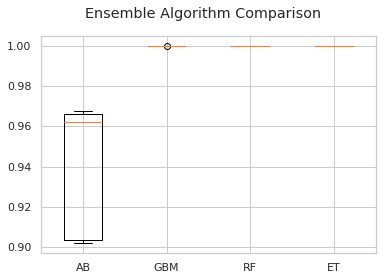

In [155]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


******  RESULTAT POUR AB ******

accuracy score : 0.8607594936708861 

Matrice de connfusion : 
[[ 9  0  0  0  0  0  0]
 [15 19  0  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 55  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0 26  0]
 [ 0  0  0  0  7  0  0]] 

              precision    recall  f1-score   support

         1.0       0.38      1.00      0.55         9
         2.0       1.00      0.56      0.72        34
         3.0       1.00      1.00      1.00        20
         4.0       1.00      1.00      1.00        55
         5.0       0.50      1.00      0.67         7
         6.0       1.00      1.00      1.00        26
         7.0       0.00      0.00      0.00         7

    accuracy                           0.86       158
   macro avg       0.70      0.79      0.70       158
weighted avg       0.90      0.86      0.85       158



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)



******  RESULTAT POUR GBM ******

accuracy score : 0.9936708860759493 

Matrice de connfusion : 
[[ 8  0  1  0  0  0  0]
 [ 0 34  0  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 55  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  7]] 

              precision    recall  f1-score   support

         1.0       1.00      0.89      0.94         9
         2.0       1.00      1.00      1.00        34
         3.0       0.95      1.00      0.98        20
         4.0       1.00      1.00      1.00        55
         5.0       1.00      1.00      1.00         7
         6.0       1.00      1.00      1.00        26
         7.0       1.00      1.00      1.00         7

    accuracy                           0.99       158
   macro avg       0.99      0.98      0.99       158
weighted avg       0.99      0.99      0.99       158


******  RESULTAT POUR RF ******



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


accuracy score : 1.0 

Matrice de connfusion : 
[[ 9  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 55  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  7]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        34
         3.0       1.00      1.00      1.00        20
         4.0       1.00      1.00      1.00        55
         5.0       1.00      1.00      1.00         7
         6.0       1.00      1.00      1.00        26
         7.0       1.00      1.00      1.00         7

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)



******  RESULTAT POUR ET ******

accuracy score : 1.0 

Matrice de connfusion : 
[[ 9  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 55  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  7]] 

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        34
         3.0       1.00      1.00      1.00        20
         4.0       1.00      1.00      1.00        55
         5.0       1.00      1.00      1.00         7
         6.0       1.00      1.00      1.00        26
         7.0       1.00      1.00      1.00         7

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


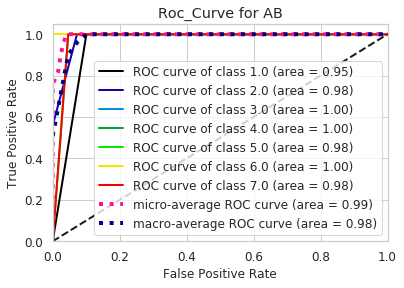

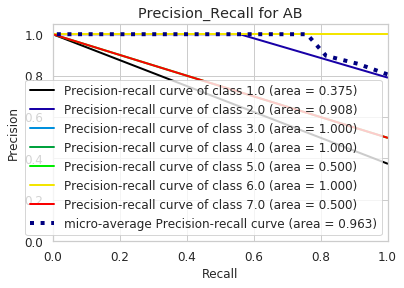

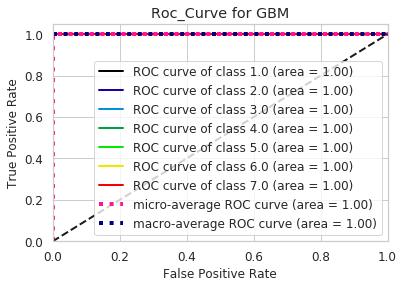

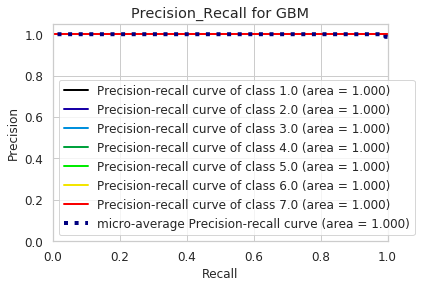

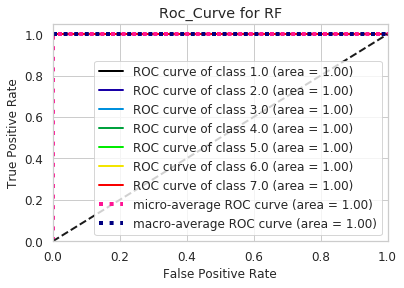

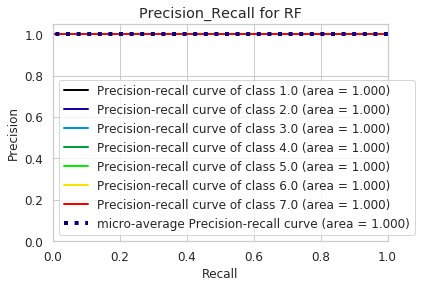

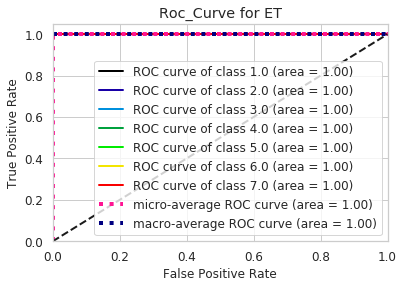

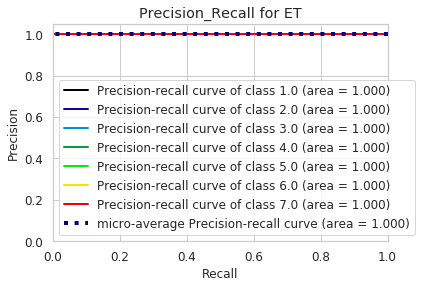

In [156]:
for name, model in ensembles:
  print("\n******  RESULTAT POUR {} ******\n".format(name))
  model.fit(X_train, Y_train)
	#scales_models.append(model)
	#names.append(name)
	#msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  # estimate accuracy on validation dataset
	#print(msg)

  #rescaledValidationX = scaler.transform(X_validation)
  predictions = model.predict(X_validation)#rescaledValidationX)
  print("accuracy score : {} \n".format(accuracy_score(Y_validation, predictions)))
  print("Matrice de connfusion : \n{} \n".format(confusion_matrix(Y_validation, predictions)))
  print(classification_report(Y_validation, predictions))
  predict_proba = getattr(model, "predict_proba", None)
  
  resultats[name]=results_report(model, X_validation, Y_validation)
  if callable(predict_proba):
    y_probas = model.predict_proba(X_validation)
    skplt.metrics.plot_roc(Y_validation, y_probas, title="Roc_Curve for {}".format(name))
    skplt.metrics.plot_precision_recall_curve(Y_validation,y_probas, title="Precision_Recall for {}".format(name))

ESTIMATION DES METRICS POUR CHAQUE ALGORITHME

In [157]:
m = pd.DataFrame.from_dict(resultats).T
m = m.sort_values(by =list(m),ascending=False)
m

,acc,recall,f_1_score,roc_auc_score
KNN,1.000,1.000,1.000,1.000
CART,1.000,1.000,1.000,1.000
NB,1.000,1.000,1.000,1.000
SVM,1.000,1.000,1.000,1.000
ScaledLR,1.000,1.000,1.000,1.000
ScaledKNN,1.000,1.000,1.000,1.000
ScaledCART,1.000,1.000,1.000,1.000
ScaledNB,1.000,1.000,1.000,1.000
ScaledSVM,1.000,1.000,1.000,1.000
RF,1.000,1.000,1.000,1.000
